# Imports

In [29]:
from pprint import pprint
import unicodedata

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from requests import get
from bs4 import BeautifulSoup
import os.path

import re
import json

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
import prepare
import explore

# Acquire

In [30]:
#Loading in json
df= pd.read_json('data2.json')

In [31]:
# Looking at values
df.head()

,repo,language,readme_contents
0,IrisShaders/Iris,Java,![Iris: An open-source shaders mod compatible with OptiFine shaderpacks](docs/banner.p...
1,returntocorp/semgrep,Java,"</br>\n<p align=""center"">\n <a href=""https://semgrep.dev""><img src=""https://raw.git..."
2,CaffeineMC/sodium-fabric,Java,"<img src=""src/main/resources/assets/sodium/icon.png"" width=""128"">\n\n# Sodium (for Fab..."
3,keycloak/keycloak,Java,# Keycloak\n\nKeycloak is an Open Source Identity and Access Management solution for m...
4,NationalSecurityAgency/ghidra,Java,"<img src=""Ghidra/Features/Base/src/main/resources/images/GHIDRA_3.png"" width=""400"">\n\..."


In [32]:
#Looking at shape of dataframe
df.shape

(225, 3)

In [33]:
#Looking at datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             225 non-null    object
 1   language         225 non-null    object
 2   readme_contents  225 non-null    object
dtypes: object(3)
memory usage: 5.4+ KB


Need to do: Prepare

1. lower case the language and repo columns
2. take out emojis
3. remove special characters
4. remove any accented characters
    - We'll go about this in three steps:
     - unicodedata.normalize removes any inconsistencies in unicode character encoding.
     - .encode to convert the resulting string to the ASCII character set. We'll ignore any errors in conversion, meaning we'll drop anything that isn't an ASCII character.
     - .decode to turn the resulting bytes object back into a string.
5. lemmantize
6. Remove any stop words?


# Prepare

In [34]:
#Prepare df using prepare function
prepare.prep_repo_data(df, extra_words=[], exclude_words=[])

,repo_name,language,readme_contents,repo_name_cleaned,language_cleaned,readme_contents_cleaned
0,IrisShaders/Iris,Java,![Iris: An open-source shaders mod compatible with OptiFine shaderpacks](docs/banner.p...,irisshadersiris,java,iris opensource shaders mod compatible optifine shaderpacksdocsbannerpng iris link vis...
1,returntocorp/semgrep,Java,"</br>\n<p align=""center"">\n <a href=""https://semgrep.dev""><img src=""https://raw.git...",returntocorpsemgrep,java,br p aligncenter hrefhttpssemgrepdevimg srchttpsrawgithubusercontentcomreturntocorpsem...
2,CaffeineMC/sodium-fabric,Java,"<img src=""src/main/resources/assets/sodium/icon.png"" width=""128"">\n\n# Sodium (for Fab...",caffeinemcsodiumfabric,java,img srcsrcmainresourcesassetssodiumiconpng width128 sodium fabric github licensehttpsi...
3,keycloak/keycloak,Java,# Keycloak\n\nKeycloak is an Open Source Identity and Access Management solution for m...,keycloakkeycloak,java,keycloak keycloak open source identity access management solution modern application s...
4,NationalSecurityAgency/ghidra,Java,"<img src=""Ghidra/Features/Base/src/main/resources/images/GHIDRA_3.png"" width=""400"">\n\...",nationalsecurityagencyghidra,java,img srcghidrafeaturesbasesrcmainresourcesimagesghidra_3png width400 ghidra software re...
...,...,...,...,...,...,...
193,lgatto/tipsntRicks,R,`tipsntRick` is a collection of R posts. \n- See the `gh-pages` branch for the web sit...,lgattotipsntricks,r,tipsntrick collection r post see ghpages branch web site see master branch relevant co...
194,immunogenomics/harmony,R,"Harmony <img src=""man/figures/logo.png"" width=""181px"" align=""right"" />\n===========\n\...",immunogenomicsharmony,r,harmony img srcmanfigureslogopng width181px alignright travisci build statushttpstravi...
195,haozhu233/kableExtra,R,"# kableExtra <img src=""https://haozhu233.github.io/kableExtra/kableExtra.svg"" align=""r...",haozhu233kableextra,r,kableextra img srchttpshaozhu233githubiokableextrakableextrasvg alignright altlogo wid...
196,r-spatial/mapview,R,"---\noutput: github_document\n---\n\n```{r setup, include = FALSE}\nknitr::opts_chunk$...",rspatialmapview,r,output github_document r setup include false knitropts_chunkset collapse true eval fal...


In [35]:
#Feature engineering

In [36]:
df_copy= df.copy()

In [37]:
df_copy.head()

,repo_name,language,readme_contents,repo_name_cleaned,language_cleaned,readme_contents_cleaned
0,IrisShaders/Iris,Java,![Iris: An open-source shaders mod compatible with OptiFine shaderpacks](docs/banner.p...,irisshadersiris,java,iris opensource shaders mod compatible optifine shaderpacksdocsbannerpng iris link vis...
1,returntocorp/semgrep,Java,"</br>\n<p align=""center"">\n <a href=""https://semgrep.dev""><img src=""https://raw.git...",returntocorpsemgrep,java,br p aligncenter hrefhttpssemgrepdevimg srchttpsrawgithubusercontentcomreturntocorpsem...
2,CaffeineMC/sodium-fabric,Java,"<img src=""src/main/resources/assets/sodium/icon.png"" width=""128"">\n\n# Sodium (for Fab...",caffeinemcsodiumfabric,java,img srcsrcmainresourcesassetssodiumiconpng width128 sodium fabric github licensehttpsi...
3,keycloak/keycloak,Java,# Keycloak\n\nKeycloak is an Open Source Identity and Access Management solution for m...,keycloakkeycloak,java,keycloak keycloak open source identity access management solution modern application s...
4,NationalSecurityAgency/ghidra,Java,"<img src=""Ghidra/Features/Base/src/main/resources/images/GHIDRA_3.png"" width=""400"">\n\...",nationalsecurityagencyghidra,java,img srcghidrafeaturesbasesrcmainresourcesimagesghidra_3png width400 ghidra software re...


<AxesSubplot:ylabel='Frequency'>

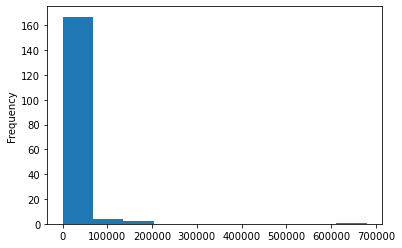

In [38]:
#Creating readme_length column
df_copy['readme_length'] = df_copy.readme_contents_cleaned.apply(len)

df_copy.groupby('language_cleaned').readme_length.mean()

df_copy.readme_length.plot.hist()

In [39]:
#Making word count column
df_copy['word_count'] = df_copy.readme_contents_cleaned.apply(str.split).apply(len)

Text(0.5, 1.0, 'read length vs word count')

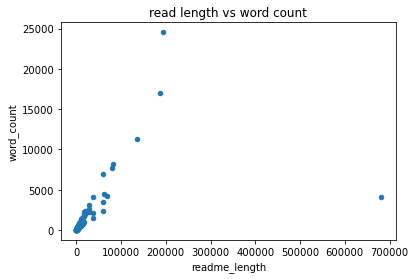

In [56]:
df_copy.plot.scatter(y='word_count', x='readme_length')
plt.title('read length vs word count')

In [41]:
df_copy.head()

,repo_name,language,readme_contents,repo_name_cleaned,language_cleaned,readme_contents_cleaned,readme_length,word_count
0,IrisShaders/Iris,Java,![Iris: An open-source shaders mod compatible with OptiFine shaderpacks](docs/banner.p...,irisshadersiris,java,iris opensource shaders mod compatible optifine shaderpacksdocsbannerpng iris link vis...,6573,842
1,returntocorp/semgrep,Java,"</br>\n<p align=""center"">\n <a href=""https://semgrep.dev""><img src=""https://raw.git...",returntocorpsemgrep,java,br p aligncenter hrefhttpssemgrepdevimg srchttpsrawgithubusercontentcomreturntocorpsem...,5960,528
2,CaffeineMC/sodium-fabric,Java,"<img src=""src/main/resources/assets/sodium/icon.png"" width=""128"">\n\n# Sodium (for Fab...",caffeinemcsodiumfabric,java,img srcsrcmainresourcesassetssodiumiconpng width128 sodium fabric github licensehttpsi...,4891,493
3,keycloak/keycloak,Java,# Keycloak\n\nKeycloak is an Open Source Identity and Access Management solution for m...,keycloakkeycloak,java,keycloak keycloak open source identity access management solution modern application s...,1910,170
4,NationalSecurityAgency/ghidra,Java,"<img src=""Ghidra/Features/Base/src/main/resources/images/GHIDRA_3.png"" width=""400"">\n\...",nationalsecurityagencyghidra,java,img srcghidrafeaturesbasesrcmainresourcesimagesghidra_3png width400 ghidra software re...,3757,413


# Exploration

In [42]:
#Looking to value counts of each category
df_copy.language_cleaned.value_counts()

javascript    47
python        47
java          42
r             38
Name: language_cleaned, dtype: int64

In [43]:
# splitting into train, validate, test
train, validate, test= explore.lang_split(df_copy)

In [44]:
# Looking at shape
train.shape, validate.shape, test.shape

((97, 8), (42, 8), (35, 8))

In [45]:
# Looking at values
train.head()

,repo_name,language,readme_contents,repo_name_cleaned,language_cleaned,readme_contents_cleaned,readme_length,word_count
8,opensearch-project/OpenSearch,Java,"<img src=""https://opensearch.org/assets/brand/SVG/Logo/opensearch_logo_default.svg"" he...",opensearchprojectopensearch,java,img srchttpsopensearchorgassetsbrandsvglogoopensearch_logo_defaultsvg height64px welco...,1350,94
196,r-spatial/mapview,R,"---\noutput: github_document\n---\n\n```{r setup, include = FALSE}\nknitr::opts_chunk$...",rspatialmapview,r,output github_document r setup include false knitropts_chunkset collapse true eval fal...,3869,297
95,mlr-org/mlr3misc,R,# mlr3misc\n\nPackage website: [release](https://mlr3misc.mlr-org.com/) | [dev](https:...,mlrorgmlr3misc,r,mlr3misc package website releasehttpsmlr3miscmlrorgcom devhttpsmlr3miscmlrorgcomdev mi...,541,18
9,sqshq/piggymetrics,Java,[![Build Status](https://travis-ci.org/sqshq/PiggyMetrics.svg?branch=master)](https://...,sqshqpiggymetrics,java,build statushttpstravisciorgsqshqpiggymetricssvgbranchmasterhttpstravisciorgsqshqpiggy...,17081,1735
60,atom/atom,JavaScript,# Atom\n\n[![Build status](https://dev.azure.com/github/Atom/_apis/build/status/Atom%2...,atomatom,javascript,atom build statushttpsdevazurecomgithubatom_apisbuildstatusatom20production20branchesb...,3238,275


In [46]:
#creating strings for content
javascript_content = ' '.join(train[train.language_cleaned == 'javascript'].readme_contents_cleaned)
python_content = ' '.join(train[train.language_cleaned == 'python'].readme_contents_cleaned)
java_content = ' '.join(train[train.language_cleaned == 'java'].readme_contents_cleaned)
r_content = ' '.join(train[train.language_cleaned == 'r'].readme_contents_cleaned)
all_content = ' '.join(train.readme_contents_cleaned)

In [47]:
#verify contents were changes to string
type(javascript_content)

str

In [48]:
#Once we have a list of words, we can transform it into a pandas Series, which we can then use to show us how 
# often each of the words occurs.
javascript_content_freq = pd.Series(javascript_content.split()).value_counts()
python_content_freq = pd.Series(python_content.split()).value_counts()
java_content_freq = pd.Series(java_content.split()).value_counts()
r_content_freq = pd.Series(r_content.split()).value_counts()
all_content_freq = pd.Series(all_content.split()).value_counts()

In [83]:
javascript_content_freq.head(20)

ul                  1065
icon                 432
freewarefreeware     395
li                   357
data                 344
const                338
target_blankimg      337
worldwide            301
use                  300
instance             274
function             273
softwareoss          263
1                    257
opensource           235
bad                  207
javascript           205
good                 202
h4                   200
one                  180
aws                  164
dtype: int64

In [84]:
python_content_freq.head(20)

yes           1013
unknown        626
data           429
api            414
learning       385
apikey         341
machine        333
video          291
library        290
python         270
use            219
using          193
file           191
model          179
format         171
deprecated     167
open           165
code           149
language       143
network        136
dtype: int64

In [85]:
java_content_freq.head(20)

use            84
service        69
build          66
project        64
java           56
&#9;           54
support        51
code           45
p              43
dependency     43
see            40
system         40
application    38
img            38
using          37
iris           37
run            36
version        36
user           35
spring         34
dtype: int64

In [86]:
r_content_freq.head(20)

r            170
data          99
model         80
package       73
use           54
function      45
install       43
using         35
time          34
book          34
version       34
example       32
type          29
course        28
file          27
run           25
please        25
series        25
code          23
modeltime     22
dtype: int64

In [87]:
all_content_freq.head(20)

ul                  1065
yes                 1022
data                 897
use                  657
unknown              629
api                  490
icon                 437
using                425
learning             398
freewarefreeware     395
1                    394
function             375
machine              362
li                   359
file                 350
apikey               342
target_blankimg      340
library              340
const                338
code                 315
dtype: int64

In [54]:
#concating all frequency columns into a dataframe
word_counts = pd.concat([javascript_content_freq, python_content_freq, java_content_freq, r_content_freq, all_content_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['javascript_freq', 'python_freq', 'java_freq', 'r_freq', 'all_content_freq' ]

In [55]:
#Looking at values of word counts
word_counts.head()

,javascript_freq,python_freq,java_freq,r_freq,all_content_freq
ul,1065,0,0,0,1065
icon,432,5,0,0,437
freewarefreeware,395,0,0,0,395
li,357,2,0,0,359
data,344,429,25,99,897


Text(0.5, 1.0, 'Javascript vs Java count for the top 20 most frequent words')

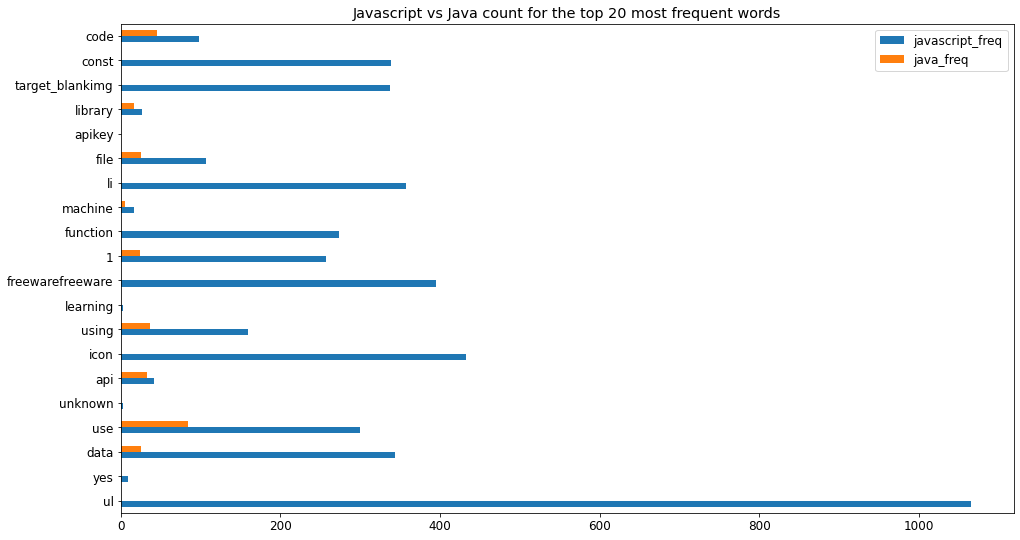

In [75]:
plt.rc('font', size=12)
plt.rc('figure', figsize=(16,9))
word_counts.sort_values('all_content_freq', ascending=False).head(20)[['javascript_freq', 'java_freq']].plot.barh()
plt.title('Javascript vs Java count for the top 20 most frequent words')

### Bags of words

In [78]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
bag_of_words = cv.fit_transform(train.readme_contents_cleaned)
bag_of_words

<97x26792 sparse matrix of type '<class 'numpy.int64'>'
	with 45407 stored elements in Compressed Sparse Row format>

In [79]:
#Put bag of words into a dataframe
pd.DataFrame(bag_of_words.todense(), columns=cv.get_feature_names())

,0001,00025,00042,007f7f,01,010x,0120,015,0150,016666667,...,zparhttpsgithubcomfrcchangzpar,zsh,zshhttpswwwzshorg,zsrcalgorithmsstringzalgorithm,zubehttpszubeiodocsapi,zuguang,zulfikarbsubabr,zulip,zuul,zxvf
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_data = tfidf.fit_transform(df['readme_contents_cleaned'])
y_data = df.language


#split x, y train
#stratify on y_data

## Bag Of Ngrams

In [97]:
cv = CountVectorizer(ngram_range=(2, 2))
bag_of_words = cv.fit_transform(train.readme_contents_cleaned)

In [96]:
pprint(train.readme.contents_cleaned)
pd.DataFrame(bag_of_words.todense(), columns=cv.get_feature_names())

                                        repo_name    language  \
8                   opensearch-project/OpenSearch        Java   
196                             r-spatial/mapview           R   
95                               mlr-org/mlr3misc           R   
9                              sqshq/piggymetrics        Java   
60                                      atom/atom  JavaScript   
153                           mui-org/material-ui  JavaScript   
33                          trekhleb/learn-python      Python   
133                                 Ciphey/Ciphey      Python   
15                                   google/guava        Java   
86                        broadinstitute/infercnv           R   
173                      remoteintech/remote-jobs  JavaScript   
158                           pablokbs/peladonerd  JavaScript   
55                                webpack/webpack  JavaScript   
1                            returntocorp/semgrep        Java   
47                       

NotFittedError: Vocabulary not fitted or provided

# Model and Evaluate